In [184]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

raiting = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [185]:
raiting.sample(10)

,userId,productId,rating
355469,210395.0,236304,5.0
4605200,32292.0,79755,4.0
2120425,125770.0,154333,5.0
6150562,32283.0,2764,5.0
7088214,2952.0,487009,5.0
5093675,12973.0,354890,5.0
4870677,653434.0,119685,5.0
3258445,893317.0,202590,5.0
3288757,421206.0,204775,5.0
6437805,239942.0,102566,3.0


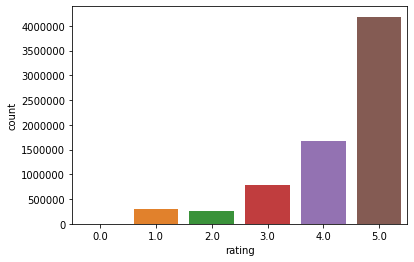

In [186]:
sns.countplot(data=raiting , x = 'rating' )
plt.show()

In [187]:
userRaitingCount = raiting['userId'].value_counts();
raitingFiltered = raiting[raiting['userId'].isin(userRaitingCount[userRaitingCount >= 50 ].index)]
print(raitingFiltered.shape)
print(raiting.shape)
productRaitingCount = raiting['productId'].value_counts();
raitingFiltered = raitingFiltered[raitingFiltered['userId'].isin(productRaitingCount[productRaitingCount >= 100 ].index)]
print(raitingFiltered.shape)

(1847803, 3)
(7202921, 3)
(35024, 3)


In [188]:
raitingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
raitingFilteredPivot = raitingFiltered.pivot( index='userId' , columns='productId' , values="rating" ).fillna(0)
display(raitingFiltered.sample(10))
print(raitingFiltered.shape)
display(raitingFilteredPivot.sample(10))
print(raitingFilteredPivot.shape)

,userId,productId,rating
3767909,4874.0,286257,3.0
4816572,31351.0,115102,4.0
531724,15596.0,46178,1.0
3525757,953.0,506610,5.0
2599249,1355.0,321161,4.0
574991,24003.0,49483,5.0
4471776,138702.0,14103,3.0
5281010,139060.0,325592,5.0
5891051,858.0,132125,5.0
3937267,953.0,84471,4.0


(34157, 3)


userId,47.0,54.0,119.0,270.0,391.0,606.0,684.0,693.0,858.0,896.0,...,166885.0,175479.0,178479.0,185409.0,193293.0,208308.0,220617.0,223706.0,285544.0,322224.0
productId,,,,,,,,,,,,,,,,,,,,,
306120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(22683, 241)


In [192]:
raitingFilteredMatrix = csr_matrix(raitingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

# queryIndex = 273
queryIndex = np.random.choice(raitingFilteredPivot.shape[0])
distances, indices = model_knn.kneighbors(raitingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0} ( {1} | {2} | {3} ) :\n'.format(products.iloc[queryIndex].product_name , 
                                                                       products.iloc[queryIndex].cat1_name,
                                                                       products.iloc[queryIndex].cat2_name,
                                                                       products.iloc[queryIndex].cat3_name))
    else:
        print('{0}: {1} ( {2} | {3} | {4} ) , with distance of {5}:'.format(i,
                                                                           products.iloc[indices.flatten()[i]].product_name ,
                                                                           products.iloc[indices.flatten()[i]].cat1_name,
                                                                           products.iloc[indices.flatten()[i]].cat2_name,
                                                                           products.iloc[indices.flatten()[i]].cat3_name,
                                                                           distances.flatten()[i]))

Recommendations for Docare 朵彩 保暖内衣 莱卡 棉内衣 打底衫 舒柔棉男式薄款套装DL2200 ( 服饰服装 | 内衣/家居服 | 打底/保暖内衣 ) :

1: Docare 朵彩 保暖内衣 莱卡 棉内衣 打底衫 舒柔棉男式薄款套装DL2200 ( 服饰服装 | 内衣/家居服 | 打底/保暖内衣 ) , with distance of 2.220446049250313e-16:
2: 儿童安全自救宝典(全四册) ( 图书音像 | 少儿/教育图书 | 少儿 ) , with distance of 2.220446049250313e-16:
3: 媒介融合:网络传播、大众传播和人际传播的三重维度 ( 图书音像 | 人文社科类图书 | 社会科学 ) , with distance of 0.29289321881345254:
4: 科学养猪技术问答(第2版) ( 图书音像 | 科技类图书 | 农业/林业 ) , with distance of 0.29289321881345254:
5: Sammalake 森姆莱克 John 精梳棉舒适中筒 纯棉大码男袜 3双礼盒装 (黑+白+蓝)(服饰) ( 服饰服装 | 内衣/家居服 | 袜子 ) , with distance of 0.29289321881345254:


In [183]:
joinEdRaiting = pd.merge(products, raitingFiltered, on='productId', how='inner')
# display(joinEdRaiting[joinEdRaiting.cat1 != 832])
#productid 1340 | cat1 =486  -> 表
# display(raitingFilteredPivot.head())
# display(raitingFilteredPivot.iloc[1, :])

In [190]:
display(raitingFilteredPivot.head())
display(raitingFilteredPivot.T.head())

userId,47.0,54.0,119.0,270.0,391.0,606.0,684.0,693.0,858.0,896.0,...,166885.0,175479.0,178479.0,185409.0,193293.0,208308.0,220617.0,223706.0,285544.0,322224.0
productId,,,,,,,,,,,,,,,,,,,,,
4,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
47.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


AttributeError: 'DataFrame' object has no attribute 'reshape'